In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cidade = 'brasilia'
lista_arquivos = os.listdir('MYs/')

In [3]:
df = pd.DataFrame()
for filename in lista_arquivos:
    if filename.endswith(".epw"): 
        #print(filename)
        df_temp = pd.read_csv(f"MYs/{filename}", sep=',', skiprows=8, header=None)
        df = pd.concat([df,df_temp])
        continue
    else:
        continue

In [9]:
df.to_csv('all_MYs.csv', index=False)

In [10]:
all_MYs = pd.read_csv('all_MYs.csv')
all_MYs.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1961,1,1,1,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.6,18.1,91,89813,...,2166,9,999999999,0,0.164,0,88,0.17,1.3,0.0
1,1961,1,1,2,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.2,18.2,94,89718,...,2709,9,999999999,0,0.164,0,88,0.17,0.3,0.0
2,1961,1,1,3,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.1,18.1,94,89647,...,2982,9,999999999,0,0.164,0,88,0.17,0.1,0.0
3,1961,1,1,4,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,18.8,18.0,95,89601,...,6329,9,999999999,0,0.164,0,88,0.17,0.0,0.0
4,1961,1,1,5,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,18.5,17.8,96,89611,...,6310,9,999999999,0,0.164,0,88,0.17,0.0,0.0


In [11]:
all_MYs['1'] = all_MYs['1'].map("{:02}".format)
all_MYs['2'] = all_MYs['2'].map("{:02}".format)
all_MYs['3'] = all_MYs['3'].map("{:02}".format)

all_MYs['3'] = all_MYs['3'].replace(['24'],'00')

all_MYs['35'] = all_MYs['0'].map(str)+'-'+all_MYs['1'].map(str)+'-'+all_MYs['2'].map(str)+' '+all_MYs['3'].map(str)+':00:00'

In [12]:
all_MYs.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1961,01,01,01,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.6,18.1,91,89813,...,9,999999999,0,0.164,0,88,0.17,1.3,0.0,1961-01-01 01:00:00
1,1961,01,01,02,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.2,18.2,94,89718,...,9,999999999,0,0.164,0,88,0.17,0.3,0.0,1961-01-01 02:00:00
2,1961,01,01,03,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.1,18.1,94,89647,...,9,999999999,0,0.164,0,88,0.17,0.1,0.0,1961-01-01 03:00:00
3,1961,01,01,04,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,18.8,18.0,95,89601,...,9,999999999,0,0.164,0,88,0.17,0.0,0.0,1961-01-01 04:00:00
4,1961,01,01,05,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,18.5,17.8,96,89611,...,9,999999999,0,0.164,0,88,0.17,0.0,0.0,1961-01-01 05:00:00


In [13]:
all_MYs['35'] = pd.to_datetime(all_MYs['35'], format = "%Y/%m/%d %H:%M:%S")

In [14]:
all_MYs.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1961,01,01,01,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.6,18.1,91,89813,...,9,999999999,0,0.164,0,88,0.17,1.3,0.0,1961-01-01 01:00:00
1,1961,01,01,02,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.2,18.2,94,89718,...,9,999999999,0,0.164,0,88,0.17,0.3,0.0,1961-01-01 02:00:00
2,1961,01,01,03,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,19.1,18.1,94,89647,...,9,999999999,0,0.164,0,88,0.17,0.1,0.0,1961-01-01 03:00:00
3,1961,01,01,04,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,18.8,18.0,95,89601,...,9,999999999,0,0.164,0,88,0.17,0.0,0.0,1961-01-01 04:00:00
4,1961,01,01,05,0,?9?9?9?9E0?9?9?9?9*9?9?9?9?9?9?9*9?9?9*9?9*9?9...,18.5,17.8,96,89611,...,9,999999999,0,0.164,0,88,0.17,0.0,0.0,1961-01-01 05:00:00


<AxesSubplot:xlabel='35'>

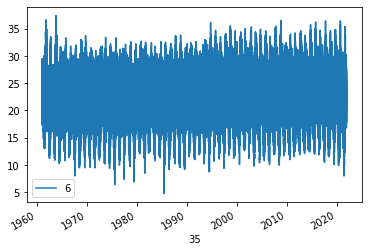

In [15]:
all_MYs.plot(x='35', y="6")

In [16]:
year_TBS = pd.DataFrame()
year_TBS['mean'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="Y"))['6'].mean()
year_TBS['median'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="Y"))['6'].median()
year_TBS['max'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="Y"))['6'].max()
year_TBS['min'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="Y"))['6'].min()
year_TBS.reset_index(level=0, inplace=True)
year_TBS = year_TBS.rename({'35': 'year'}, axis='columns')
year_TBS.head()

,year,mean,median,max,min
0,1961,22.814189,22.3,36.6,13.0
1,1962,21.050719,20.5,33.5,11.2
2,1963,21.837032,21.2,37.4,10.9
3,1964,20.415187,19.9,31.7,10.3
4,1965,20.905571,20.2,33.3,10.8


<AxesSubplot:>

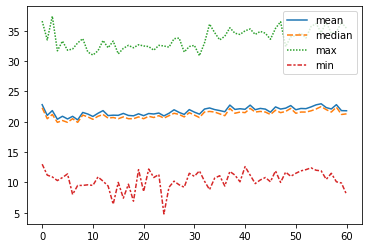

In [17]:
sns.lineplot(data=year_TBS)

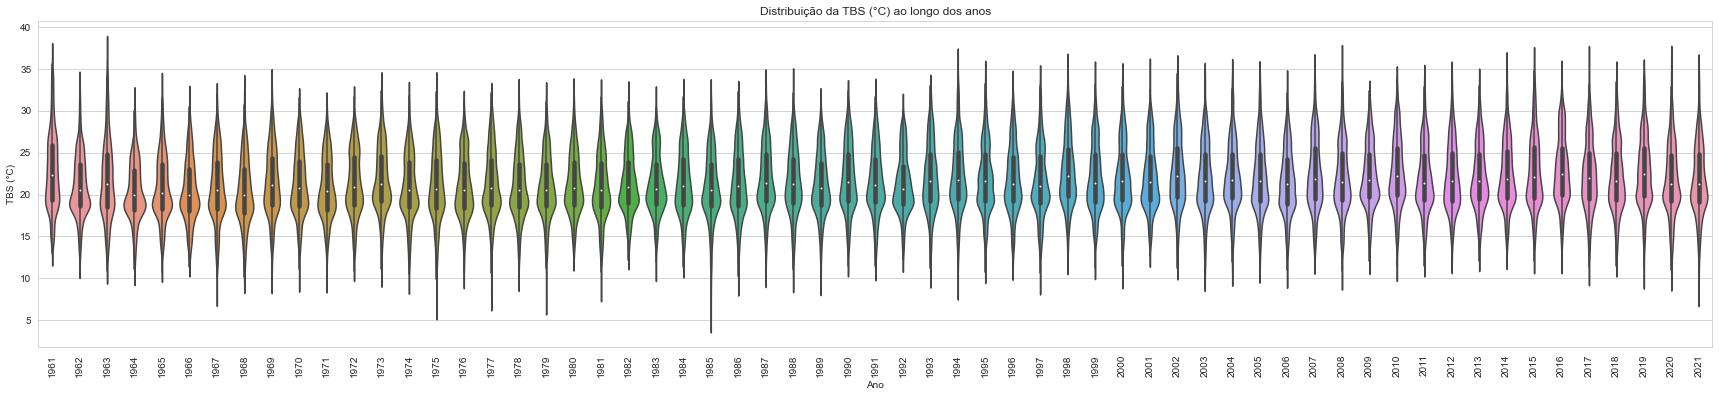

In [20]:
plt.figure(figsize=(30,6))
sns.set_style('whitegrid')
g = sns.violinplot(x="0", y="6",data=all_MYs, dodge=False)
plt.title("Distribuição da TBS (°C) ao longo dos anos")
plt.ylabel("TBS (°C)")
plt.xlabel("Ano")
plt.xticks(rotation=90)
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_violin_tbs.png', bbox_inches='tight', dpi=300) 

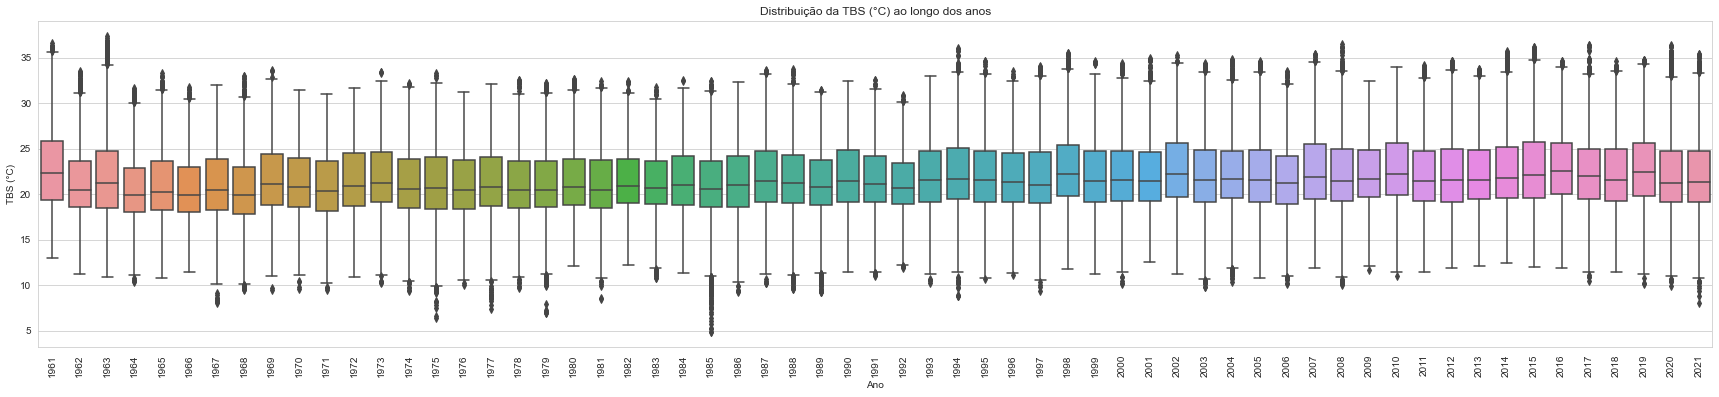

In [21]:
plt.figure(figsize=(30,6))
sns.set_style('whitegrid')
sns.boxplot(x="0", y="6",data=all_MYs, dodge=False)
plt.title("Distribuição da TBS (°C) ao longo dos anos")
plt.ylabel("TBS (°C)")
plt.xlabel("Ano")
plt.xticks(rotation=90)

plt.show()

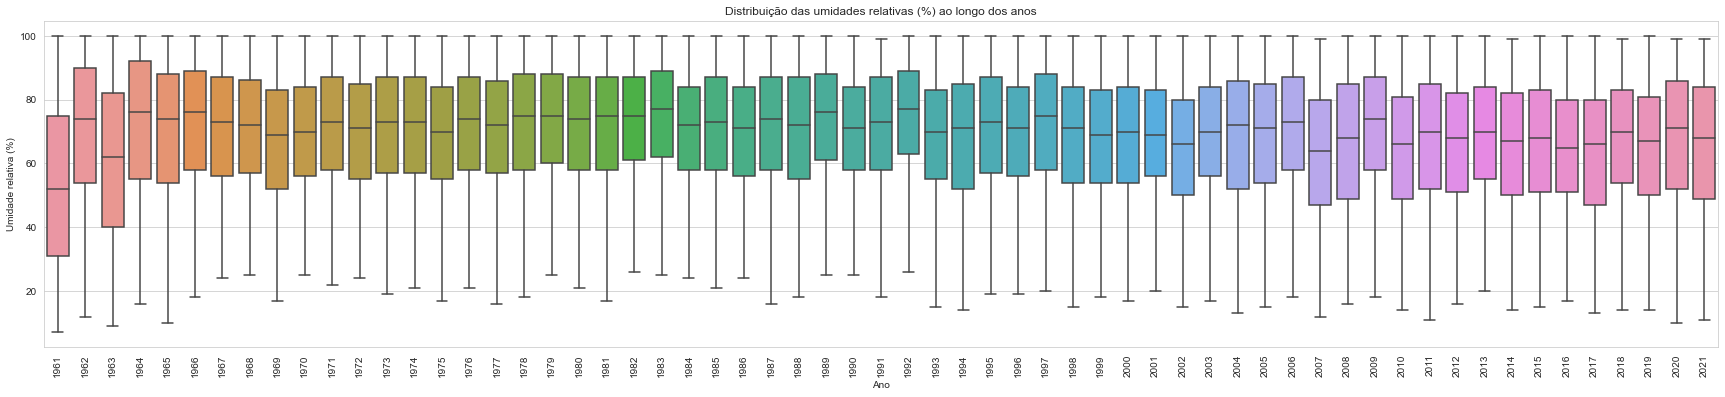

In [22]:
plt.figure(figsize=(30,6))
sns.set_style('whitegrid')
g = sns.boxplot(x="0", y="8",data=all_MYs, dodge=False)
plt.title("Distribuição das umidades relativas (%) ao longo dos anos")
plt.ylabel("Umidade relativa (%)")
plt.xlabel("Ano")
plt.xticks(rotation=90)

plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_boxplot_ur.png', bbox_inches='tight', dpi=300) 

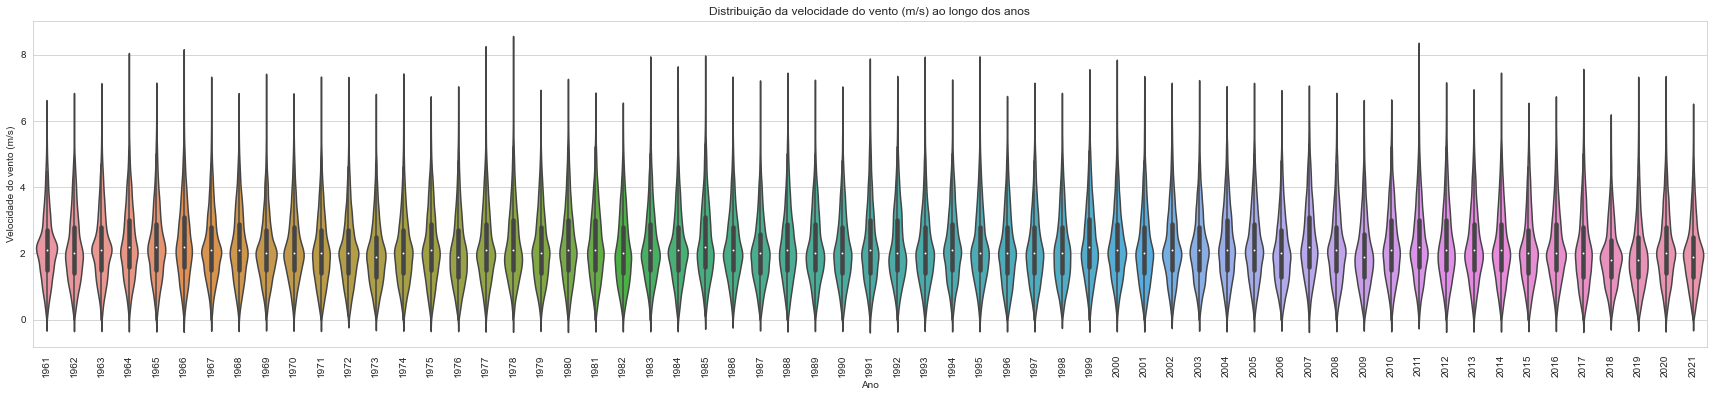

In [23]:
plt.figure(figsize=(30,6))
sns.set_style('whitegrid')
g = sns.violinplot(x="0", y="21",data=all_MYs, dodge=False)
plt.title("Distribuição da velocidade do vento (m/s) ao longo dos anos")
plt.ylabel("Velocidade do vento (m/s)")
plt.xlabel("Ano")
plt.xticks(rotation=90)

plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_violin_ws.png', bbox_inches='tight', dpi=300) 

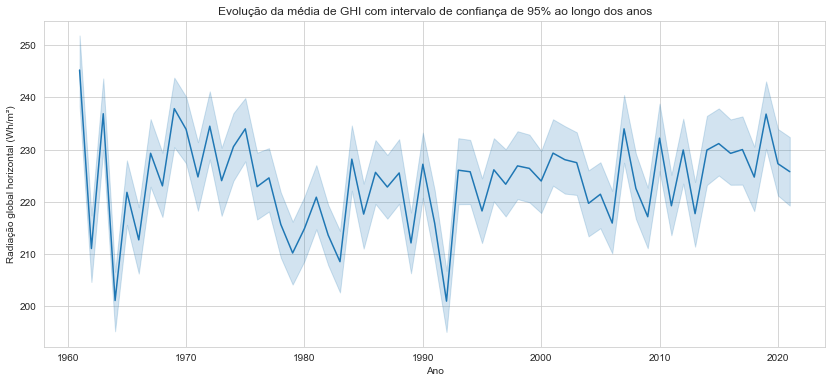

In [25]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
g = sns.lineplot(data=all_MYs, x="0", y="13")
plt.title("Evolução da média de GHI com intervalo de confiança de 95% ao longo dos anos")
plt.ylabel("Radiação global horizontal (Wh/m²)")
plt.xlabel("Ano")

plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_ghi.png', bbox_inches='tight', dpi=300) 

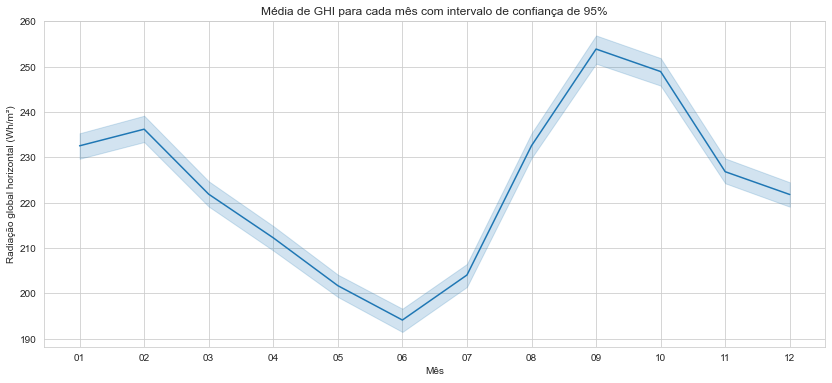

In [26]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
g = sns.lineplot(data=all_MYs, x="1", y="13")
plt.title("Média de GHI para cada mês com intervalo de confiança de 95%")
plt.ylabel("Radiação global horizontal (Wh/m²)")
plt.xlabel("Mês")
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_ghi_month.png', bbox_inches='tight', dpi=300) 

In [27]:
palette_year = ['#ff0000', # Janeiro  
                '#ff6800',  # Fevereiro        
                '#ffc900',  # Março
                '#fff300',  # Abril
                '#8fff00',  # Maio
                '#27b600',  # Junho
                '#00af67',  # Julho                               
                '#009faf',  # Agosto
                '#0062af',  # Setembro
                '#d6c000',  # Outubro
                '#d69800',  # Novembro
                '#d66500',  # Dezembro                                
                   ]

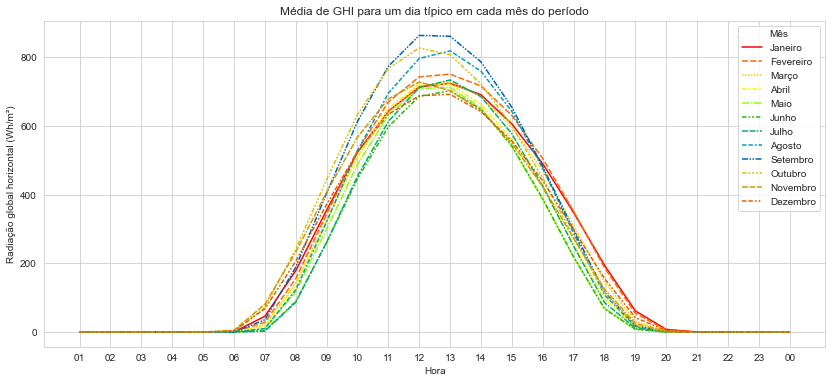

In [28]:
plt.figure(figsize=(14,6))
sns.set_style('whitegrid')
g = sns.lineplot(data=all_MYs, x="3", y="13", hue='1', style="1", palette=palette_year, ci=None)
plt.title("Média de GHI para um dia típico em cada mês do período")
plt.ylabel("Radiação global horizontal (Wh/m²)")
plt.xlabel("Hora")
plt.legend(title='Mês', labels=['Janeiro','Fevereiro','Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])
plt.show()

fig = g.get_figure()
fig.savefig(cidade+'_ghi_day.png', bbox_inches='tight', dpi=300) 

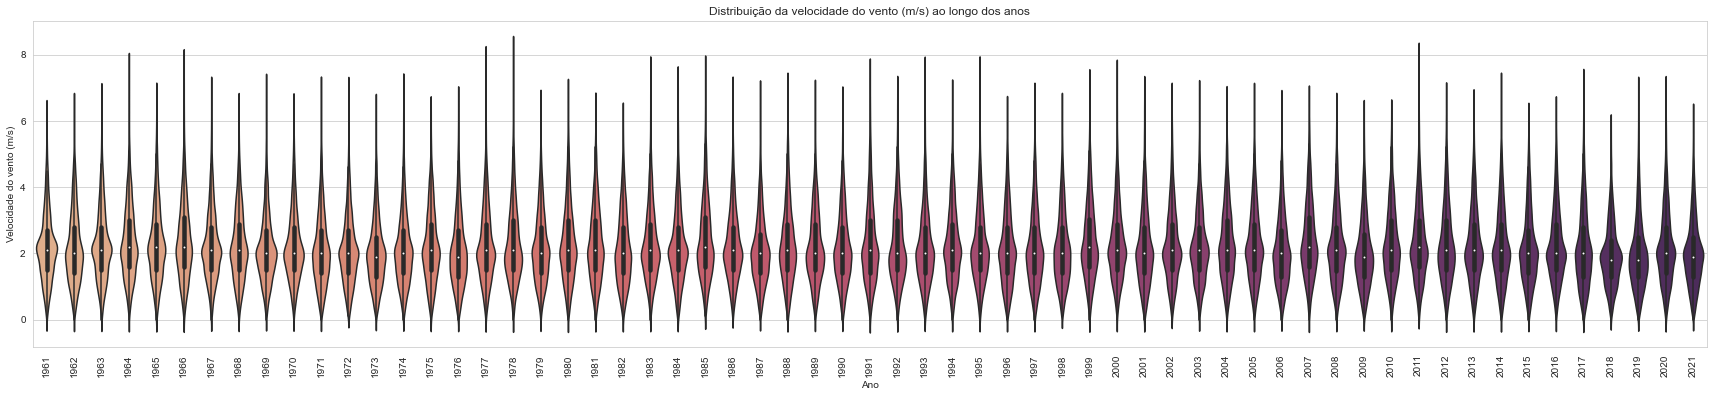

In [29]:
plt.figure(figsize=(30,6))
sns.set_style('whitegrid')
g = sns.violinplot(x="0", y="21",data=all_MYs, dodge=False, palette='flare')
plt.title("Distribuição da velocidade do vento (m/s) ao longo dos anos")
plt.ylabel("Velocidade do vento (m/s)")
plt.xlabel("Ano")
plt.xticks(rotation=90)

plt.show()


In [30]:
month_MYs = pd.DataFrame()
month_MYs['TBS_mean'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['6'].mean()
month_MYs['TBS_median'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['6'].median()
month_MYs['TBS_max'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['6'].max()
month_MYs['TBS_min'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['6'].min()
month_MYs['GHI_mean'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['13'].mean()
month_MYs['GHI_median'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['13'].median()
month_MYs['GHI_max'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['13'].max()
month_MYs['GHI_min'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="M"))['13'].min()
month_MYs.reset_index(level=0, inplace=True)
month_MYs = month_MYs.rename({'35': 'timeperiod'}, axis='columns')
month_MYs['year'] = month_MYs['timeperiod'].dt.year
month_MYs['month'] = month_MYs['timeperiod'].dt.month
month_MYs.head()

,timeperiod,TBS_mean,TBS_median,TBS_max,TBS_min,GHI_mean,GHI_median,GHI_max,GHI_min,year,month
0,1961-01,22.538038,22.0,29.5,17.3,260.083333,40.5,1064,0,1961,1
1,1961-02,21.723810,21.0,28.5,17.2,243.500000,27.0,1016,0,1961,2
2,1961-03,21.878495,21.1,27.9,14.8,254.163978,13.0,1014,0,1961,3
3,1961-04,22.754167,22.1,29.3,15.0,248.518056,10.0,1013,0,1961,4
4,1961-05,22.197581,21.5,30.0,13.2,224.647849,4.5,889,0,1961,5


In [31]:
month_TBS_mean = month_MYs.pivot("month", "year", "TBS_mean")
month_TBS_mean.head()

year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,,,,,,,,
1,22.538038,21.022984,21.784409,20.221640,20.575672,21.523522,21.934677,21.939516,22.494489,21.736962,...,21.322984,21.952016,22.972581,24.231720,22.254032,23.539247,22.857796,23.671371,22.811290,22.706989
2,21.723810,21.214881,20.836756,21.136638,21.045089,21.218601,21.744196,20.285057,22.766220,21.715476,...,22.181322,23.807440,22.676339,22.449851,23.928161,22.479315,22.379911,23.048363,22.418103,21.508482
3,21.878495,21.041532,21.767608,21.258737,21.126344,21.090054,21.638978,21.154435,22.239785,22.177823,...,22.662903,23.031317,22.163306,21.745565,23.361156,23.402285,22.922177,22.472312,22.167608,22.195833
4,22.754167,20.751250,20.541667,20.951250,20.469583,20.081944,20.800556,20.616667,21.972361,21.218194,...,23.037361,21.707778,22.608056,22.191806,23.914583,22.926944,21.287222,22.687361,21.819722,21.370556
5,22.197581,19.707124,19.038978,19.557661,19.482661,18.951478,19.199059,18.506048,20.236156,20.455242,...,20.413710,21.355242,21.511559,20.542204,22.452554,21.608871,20.513844,22.155780,19.701747,20.684677


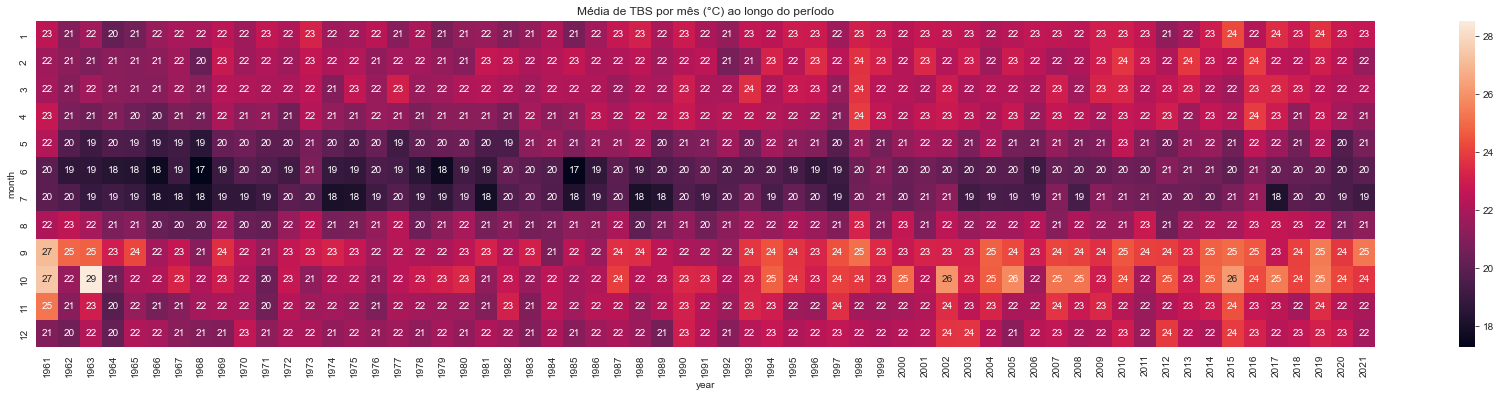

In [35]:
month_TBS_mean = month_MYs.pivot("month", "year", "TBS_mean")

plt.figure(figsize=(30,6))
g = sns.heatmap(month_TBS_mean, annot=True)
plt.title("Média de TBS por mês (°C) ao longo do período")
plt.xticks(rotation=90)

fig = g.get_figure()
fig.savefig(cidade +'_heatmap_TBS_month_mean.png', bbox_inches='tight', dpi=300) 

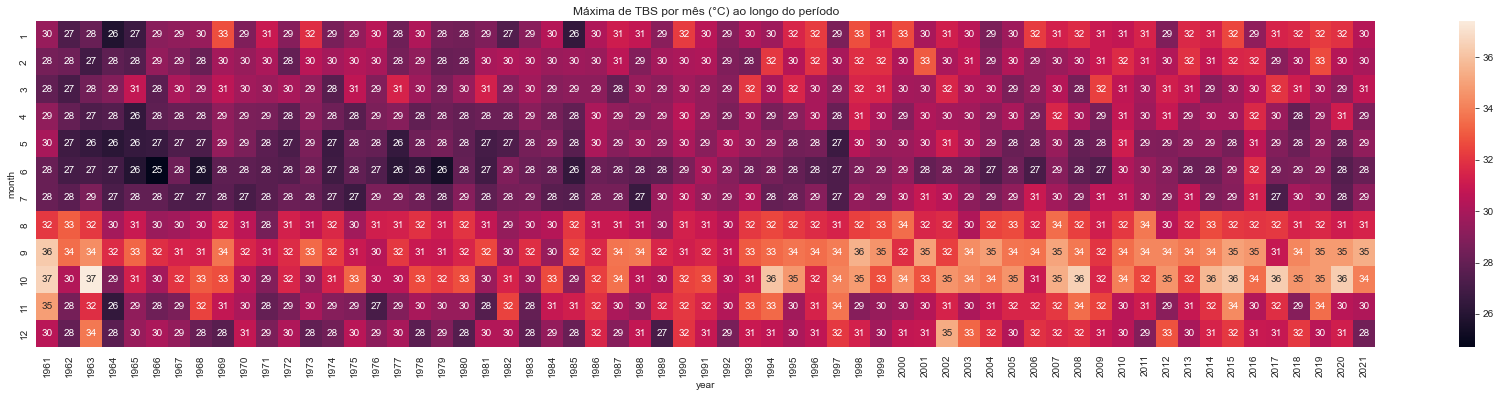

In [36]:
month_TBS_max = month_MYs.pivot("month", "year", "TBS_max")

plt.figure(figsize=(30,6))
g = sns.heatmap(month_TBS_max, annot=True)
plt.title("Máxima de TBS por mês (°C) ao longo do período")
plt.xticks(rotation=90)

fig = g.get_figure()
fig.savefig(cidade +'_heatmap_TBS_month_max.png', bbox_inches='tight', dpi=300) 

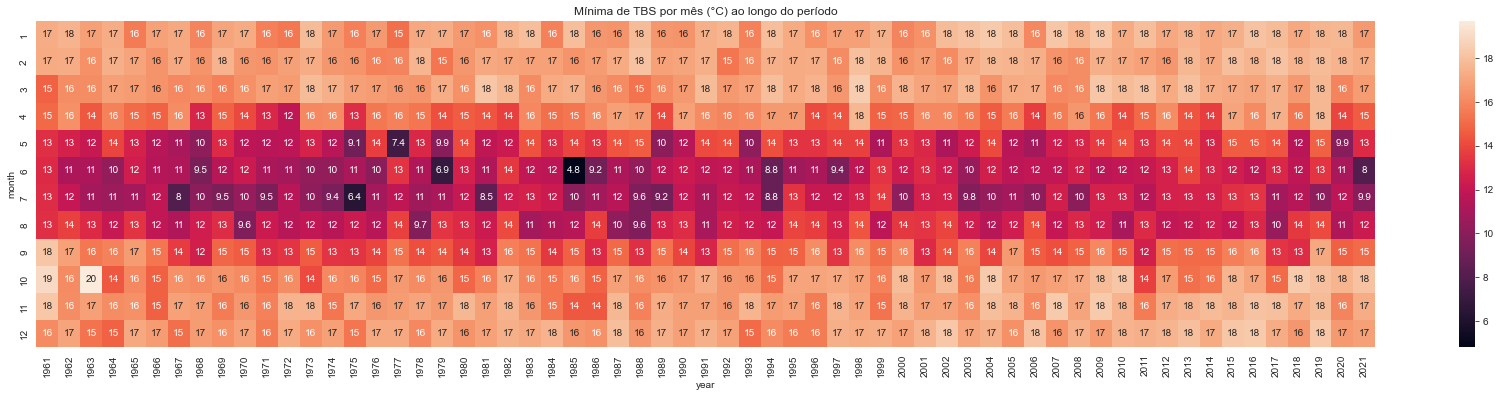

In [37]:
month_TBS_max = month_MYs.pivot("month", "year", "TBS_min")

plt.figure(figsize=(30,6))
g = sns.heatmap(month_TBS_max, annot=True)
plt.title("Mínima de TBS por mês (°C) ao longo do período")
plt.xticks(rotation=90)

fig = g.get_figure()
fig.savefig(cidade + '_heatmap_TBS_month_min.png', bbox_inches='tight', dpi=300) 

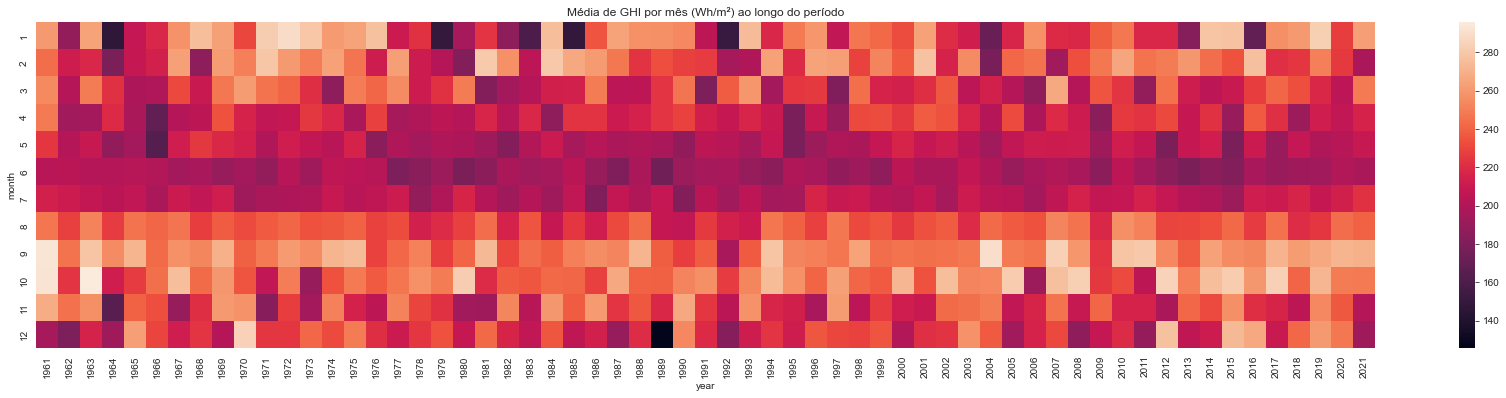

In [38]:
month_GHI_mean = month_MYs.pivot("month", "year", "GHI_mean")

plt.figure(figsize=(30,6))
g = sns.heatmap(month_GHI_mean)
plt.title("Média de GHI por mês (Wh/m²) ao longo do período")
plt.xticks(rotation=90)

fig = g.get_figure()
fig.savefig(cidade +'_heatmap_GHI_month_mean.png', bbox_inches='tight', dpi=300) 

In [39]:
hour_MYs = pd.DataFrame()
hour_MYs['TBS_mean'] = all_MYs.groupby(pd.PeriodIndex(all_MYs['35'], freq="H"))['6'].mean()
hour_MYs.reset_index(level=0, inplace=True)
hour_MYs = hour_MYs.rename({'35': 'timeperiod'}, axis='columns')
hour_MYs['year'] = hour_MYs['timeperiod'].dt.year
hour_MYs['month'] = hour_MYs['timeperiod'].dt.month
hour_MYs['day'] = hour_MYs['timeperiod'].dt.day
hour_MYs['hour'] = hour_MYs['timeperiod'].dt.hour
hour_MYs['year_month_day'] = hour_MYs['year'].astype(str) + '_' + hour_MYs['month'].astype(str) + '_' + hour_MYs['day'].astype(str)
hour_MYs.head()

,timeperiod,TBS_mean,year,month,day,hour,year_month_day
0,1961-01-01 00:00,21.3,1961,1,1,0,1961_1_1
1,1961-01-01 01:00,19.6,1961,1,1,1,1961_1_1
2,1961-01-01 02:00,19.2,1961,1,1,2,1961_1_1
3,1961-01-01 03:00,19.1,1961,1,1,3,1961_1_1
4,1961-01-01 04:00,18.8,1961,1,1,4,1961_1_1


In [40]:
hour_TBS_mean = hour_MYs.pivot("hour", "year_month_day", "TBS_mean")
hour_TBS_mean.head()

year_month_day,1961_10_1,1961_10_10,1961_10_11,1961_10_12,1961_10_13,1961_10_14,1961_10_15,1961_10_16,1961_10_17,1961_10_18,...,2021_9_28,2021_9_29,2021_9_3,2021_9_30,2021_9_4,2021_9_5,2021_9_6,2021_9_7,2021_9_8,2021_9_9
hour,,,,,,,,,,,,,,,,,,,,,
0,25.7,24.9,24.8,24.9,26.1,26.2,25.2,25.5,25.9,26.8,...,24.1,23.2,21.0,23.4,21.5,23.3,23.5,25.6,22.6,22.3
1,25.6,23.5,24.0,24.5,24.2,25.5,25.5,24.4,25.0,24.8,...,21.6,22.8,19.6,21.5,19.4,20.2,20.7,22.3,24.5,21.7
2,24.6,22.7,23.1,23.9,24.6,24.8,25.6,23.7,24.3,24.1,...,20.8,22.5,19.0,21.3,18.8,19.4,19.9,22.1,23.7,21.4
3,23.6,22.1,22.5,24.0,23.7,23.9,25.0,23.2,23.8,23.6,...,20.2,21.6,17.7,20.4,17.9,18.6,19.6,21.5,23.0,21.1
4,22.8,21.6,22.0,23.6,23.2,23.2,24.1,22.7,22.8,23.1,...,19.9,21.8,17.1,19.6,17.8,18.2,19.8,22.0,22.4,20.3


(array([5.00000e-01, 2.79500e+02, 5.58500e+02, 8.37500e+02, 1.11650e+03,
        1.39550e+03, 1.67450e+03, 1.95350e+03, 2.23250e+03, 2.51150e+03,
        2.79050e+03, 3.06950e+03, 3.34850e+03, 3.62750e+03, 3.90650e+03,
        4.18550e+03, 4.46450e+03, 4.74350e+03, 5.02250e+03, 5.30150e+03,
        5.58050e+03, 5.85950e+03, 6.13850e+03, 6.41750e+03, 6.69650e+03,
        6.97550e+03, 7.25450e+03, 7.53350e+03, 7.81250e+03, 8.09150e+03,
        8.37050e+03, 8.64950e+03, 8.92850e+03, 9.20750e+03, 9.48650e+03,
        9.76550e+03, 1.00445e+04, 1.03235e+04, 1.06025e+04, 1.08815e+04,
        1.11605e+04, 1.14395e+04, 1.17185e+04, 1.19975e+04, 1.22765e+04,
        1.25555e+04, 1.28345e+04, 1.31135e+04, 1.33925e+04, 1.36715e+04,
        1.39505e+04, 1.42295e+04, 1.45085e+04, 1.47875e+04, 1.50665e+04,
        1.53455e+04, 1.56245e+04, 1.59035e+04, 1.61825e+04, 1.64615e+04,
        1.67405e+04, 1.70195e+04, 1.72985e+04, 1.75775e+04, 1.78565e+04,
        1.81355e+04, 1.84145e+04, 1.86935e+04, 1.89

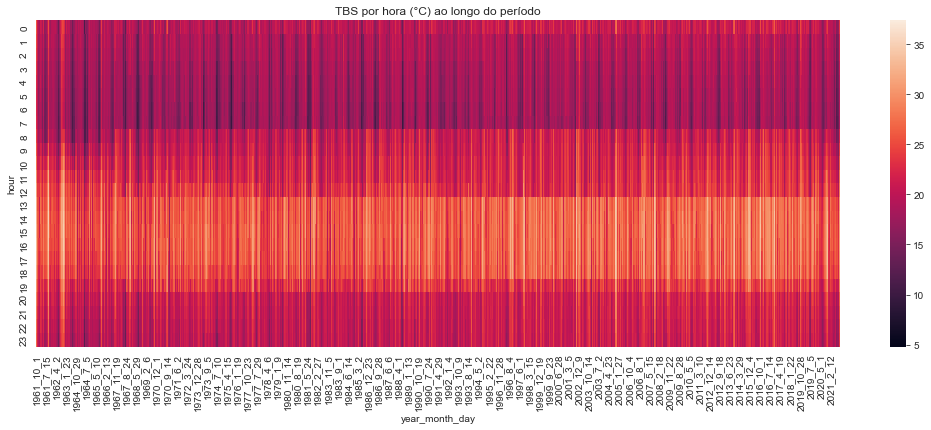

In [41]:
plt.figure(figsize=(18,6))
g = sns.heatmap(hour_TBS_mean)
plt.title("TBS por hora (°C) ao longo do período")
plt.xticks(rotation=90)

#fig = g.get_figure()
#fig.savefig('sao_paulo'+'_heatmap_TBS_hour.png', bbox_inches='tight', dpi=300) 